In [1]:
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib qt

In [3]:


def filter_butter(separation, cutoff: float, order: int):
    """
    Butterworth digital filter, applies the filter forwards and backwards so the end result
    won't have a phase shift. Order will be multiplied by 2 (once for each pass of the filter).

    :param separation: Separation to filter
    :param cutoff: Digital filter cutoff
    :param order: Order for the single pass of the filterhEGF_Gefit_041121
    :return: filtered RFu
    """

    # Filtering Functions
    # noinspection PyTupleAssignmentBalance
    def butter_lowpass():
        nyq = 0.5 * dt
        normal_cutoff = cutoff / nyq
        b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    dt = 1 / np.median(np.diff(separation.time_data))
    b, a = butter_lowpass()
    rfu_filtered = signal.filtfilt(b, a, separation.rfu, padlen=24, padtype='constant')

    return rfu_filtered


def filter_savgol(separation, window_size: int, poly_order: int):
    """
    Performs a savintsky-golay filter of the dataset, applying a gaussian window of the specified size across
    the dataset.

    :param separation:
    :param window_size: must be odd number, size of window
    :param poly_order:  Polynomial to apply for fit
    :return:
    """

    mode = 'mirror'
    return signal.savgol_filter(separation.rfu, window_size, poly_order, mode=mode)

def convert_gigace_data(df):
    """
    Gigace stores the data using different headers. Adjust the column names to what this program expects. 
    
    :param df: dataframe containing electropherogram data. 
    :return df: returns header adjusted dataframe. 
    """
    if 'time' in df.columns:
        df.rename(columns={'time':'time_data', 'RFU':'rfu'}, inplace=True)
    return df

In [5]:
# BUTTER FILTER YOUR DATA
CUTOFF = 0.8 # Hertz
ORDER = 2 # filter order
DATA_FOLDER = r"C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data"

for file in glob.glob(DATA_FOLDER+"\*.csv"):
    print(file)
    df = pd.read_csv(file)
    df = convert_gigace_data(df)
    df['rfu']=filter_butter(df, cutoff=CUTOFF, order=ORDER)
    file_out = file[:-4]+'_filtered.csv'
    df.to_csv(file_out, index=False)
    

C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data\20210505_YuliK562Lysate_SA_1to20dilution.csv
C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data\20210505_YuliK562Lysate_SA_1to20dilution_00000.csv
C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data\20210505_YuliK562Lysate_SA_1to20dilution_00001.csv
C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data\20210505_YuliK562Lysate_SA_1to20dilution_00002.csv
C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data\20210505_YuliK562Lysate_SA_1to20dilution_00003.csv
C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data\20210505_YuliK562Lysate_SA_1to20dilution_00004.csv
C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data\20210505_YuliK562Lysate_SA_1to20dilution_00005.csv
C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data\20210505_YuliK562Lysate_SA_1to20dilution_00006.csv
C:\Users\NikonTE300CE\Desktop\Barracuda_Updated\AutomatedCE\Data\20210505_Yuli

In [13]:
# SAVINSKY GOLAY FILTER YOUR DATA
WINDOW_SIZE = 19 # size of window to use
POLY_ORDER = 2 # polynomial to use
DATA_FOLDER = r"C:\Users\Luke\Documents\Matt A\11_14_20 CE Data"


for file in glob.glob(DATA_FOLDER+"\*.csv"):
    print(file)
    df = pd.read_csv(file)
    df = convert_gigace_data(df)
    df['rfu']=filter_savgol(df, window_size=WINDOW_SIZE, poly_order=POLY_ORDER)
    file_out = file[:-4]+'_filtered.csv'
    df.to_csv(file_out, index=False)
    

In [5]:
# Find Peak
df

,time_data,rfu,voltage,current
0,0.000,0.001131,2.128664,21.995924
1,0.125,0.001363,2.642677,27.236792
2,0.250,0.001590,4.052275,41.470214
3,0.375,0.001771,5.741450,58.514106
4,0.500,0.001893,7.234158,73.583712
...,...,...,...,...
2389,298.625,0.002237,15.894958,158.949584
2390,298.750,0.002236,15.894958,158.949584
2391,298.875,0.002235,15.894958,158.949584
2392,299.000,0.002235,15.894958,158.949584


In [6]:
from scipy import signal
xs = df['time_data']
data = df['rfu']
peakind = signal.find_peaks_cwt(data, np.arange(15,150))
peakind, xs[peakind], data[peakind]

(array([  16,  395,  704,  877, 1228, 1497, 1826, 2185, 2379], dtype=int64),
 16        2.000
 395      49.375
 704      88.000
 877     109.625
 1228    153.500
 1497    187.125
 1826    228.250
 2185    273.125
 2379    297.375
 Name: time_data, dtype: float64,
 16      0.002071
 395     0.002244
 704     0.002518
 877     0.002286
 1228    0.002276
 1497    0.002363
 1826    0.002276
 2185    0.002246
 2379    0.002232
 Name: rfu, dtype: float64)

In [7]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
sns.set_context('talk')
from scipy.signal import find_peaks
xs = df['time_data']
data = df['rfu']
peaks, properties = find_peaks(data, height=0.001, threshold=0.00001, width=3, rel_height=0.98)
plt.plot(xs, data)
#plt.plot(peaks, data[peaks], "x")
#plt.vlines(x=peaks, ymin=data[peaks] - properties["prominences"],
#           ymax = data[peaks], color = "C1")
#plt.hlines(y=properties["width_heights"], xmin=xs[properties["left_ips"]],
#           xmax=xs[properties["right_ips"]], color = "C1")
plt.show()
ax = plt.gca()
ax.set_xlabel('Time (s)')
ax.set_ylabel('SiPM Voltage (V)')

Text(0, 0.5, 'SiPM Voltage (V)')

In [77]:
# Auto analyze your data 
def get_label_sfd(name):
    if name.find('sfd')>=0:
        return 'SFD'
    else:
        return "Gravity"
    
def get_label_power(name):
    name = name.split('mW')
    name = name[0].split('_')
    #print(name)
    return name[-1]

def get_rep_number(name):
    name = name.strip('.csv').split('mW')
    print(name)
    if name[-1]=='':
        rep=1
    else:
        rep = int(name[-1].replace('_',''))+2
    print(rep)
    return rep

    
def find_noise(Y, width=50, skip=5):
    noise = np.nan
    background = np.nan
    for i in range(skip,len(Y)-width-skip):
        new_noise = np.std(Y[i:i+width])
        
        if new_noise < noise or np.isnan(noise):
            noise = new_noise
            background = np.median(Y) 
    #print(noise, background)
    return noise, background
    

DATA_FOLDER = r"C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020"
data = {'label':[],'max':[], 'SNR':[], 'noise':[], "background":[], "location":[],'file':[], 'rep':[]}
for file in glob.glob(DATA_FOLDER+"\*.csv"):
    df = pd.read_csv(file)
    df['rfu']=filter_butter(df, cutoff=3.9,order=2 )
    lbl = get_label_power(file)
    rep = get_rep_number(file)
    noise, background = find_noise(df['rfu'])
    peaks, properties = find_peaks(df['rfu'], height=3*noise+background)
    for pk in peaks:
        data['label'].append(lbl)
        data['max'].append(df['rfu'].values[pk]-background)
        data['SNR'].append((df['rfu'].values[pk]-background)/noise)
        data['noise'].append(noise)
        data['background'].append(background)
        data['location'].append(pk)
        data['file'].append(file)
        data['rep'].append(rep)
        
    

['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_10', '']
1
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_10', '_00000']
2
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_10', '_00001']
3
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_10', '_00002']
4
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_10', '_00003']
5
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_10', '_00004']
6
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_10', '_00005']
7
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_10', '_00006']
8
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_11', '']
1
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_11', '_00000']
2
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100nM_11', '_00001']
3
['C:\\Users\\NikonTE300CE\\Desktop\\Brae\\10-26-2020\\C24C_24C_100

In [50]:
fluor_peak\

,label,max,SNR,noise,background,location,file,rep,normal_snr,normal_max,normal_noise
4,1,0.000852,59.324199,0.000014,0.006525,138,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,3,1.176154,1.571109,1.393058
11,1,0.000727,55.083215,0.000013,0.006530,137,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,5,1.092073,1.341136,1.280702
17,1,0.000801,64.933993,0.000012,0.006482,137,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,7,1.287373,1.477659,1.197007
23,2,0.001661,111.938461,0.000015,0.006996,134,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,3,2.219278,3.064269,1.439932
31,2,0.001386,97.758972,0.000014,0.007071,138,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,5,1.938157,2.555757,1.375173
38,2,0.001231,117.288596,0.000010,0.007088,137,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,7,2.325349,2.269976,1.018028
44,3,0.001114,101.756653,0.000011,0.007618,135,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,3,2.017415,2.055414,1.062505
68,3,0.000697,51.669903,0.000013,0.007421,137,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,5,1.024401,1.286088,1.309265
93,4,0.000663,55.541539,0.000012,0.007816,136,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,3,1.101160,1.222355,1.157641
161,6,0.000619,53.114193,0.000012,0.008107,136,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...,5,1.053035,1.142395,1.131359


In [78]:
# Plot SNR vs Laser Power and fit it
df2 = pd.DataFrame(data)
import seaborn as sns
df2['label']=pd.to_numeric(df2['label'])
df2['normal_snr']=df2['SNR']/min(df2['SNR'])
df2['normal_max']=df2['max']/min(df2['max'])
df2['normal_noise']=df2['noise']/min(df2['noise'])
fluor_peak = df2[df2['location'].between(134, 142, inclusive=False)].copy()
fluor_peak['normal_snr']=fluor_peak['SNR']/min(fluor_peak['SNR'])
fluor_peak['normal_max']=fluor_peak['max']/min(fluor_peak['max'])
fluor_peak['normal_noise']=fluor_peak['noise']/min(fluor_peak['noise'])
fluor_peak = fluor_peak[fluor_peak['SNR']>20]
fluor_peak = fluor_peak[fluor_peak['rep']%2==0]

fig, ax = plt.subplots()
y_id = 'SNR'
#ax.scatter(fluor_peak['label'], fluor_peak['SNR'])
sns.lineplot(x='label', y=y_id, data=fluor_peak, ax=ax, err_style='bars', ci=68)

# Fit to x^2
z = np.polyfit(fluor_peak['label'], fluor_peak[y_id], deg=2)
f = np.poly1d(z)
x = np.linspace(1,15)
y = f(x)
ax.plot(x,y, color='r', alpha=0.5, ls='--',label='$x^2$ poly fit')
ax.set_ylabel('SNR')
ax.set_xticks([x for x in range(1,16)])
ax.set_xticklabels([x for x in range(1,16)], rotation=45, ha='right')

ax.set_xlabel('Laser Power (mW)')
plt.legend()
plt.tight_layout()
print(z)

[  1.68808258 -65.65644811 674.94375111]


In [18]:
# Plot SNR vs Laser Power and fit it
df2 = pd.DataFrame(data)
import seaborn as sns
df2['label']=pd.to_numeric(df2['label'])
df2['normal_snr']=df2['SNR']/min(df2['SNR'])
df2['normal_max']=df2['max']/min(df2['max'])
df2['normal_noise']=df2['noise']/min(df2['noise'])
fluor_peak = df2[df2['location'].between(0, 700, inclusive=False)].copy()
fluor_peak = fluor_peak[fluor_peak['SNR']>3]

fluor_peak['normal_snr']=fluor_peak['SNR']/min(fluor_peak['SNR'])
fluor_peak['normal_max']=fluor_peak['max']/min(fluor_peak['max'])
fluor_peak['normal_noise']=fluor_peak['noise']/min(fluor_peak['noise'])

fig, ax = plt.subplots()
y_id = 'normal_max'
x_id = 'normal_noise'
#ax.scatter(fluor_peak['label'], fluor_peak['SNR'])
sns.lineplot(x=x_id, y=y_id, data=fluor_peak, ax=ax, err_style='bars', ci=68)

# Fit to x^2
z = np.polyfit(fluor_peak[x_id], fluor_peak[y_id], deg=2)
f = np.poly1d(z)
x = np.linspace(1,15)
y = f(x)
ax.plot(x,y, color='r', alpha=0.5, ls='--',label='$x^2$ poly fit')
ax.set_xticks([x for x in range(1,16)])
ax.set_xticklabels([x for x in range(1,16)], rotation=45, ha='right')
ax.set_ylabel('Normalized Signal')
ax.set_xlabel('Normalized Noise')
plt.legend()
plt.tight_layout()
print(z)

[ 291.93366453 -751.87839638  550.28259186]


In [66]:
fig, ax = plt.subplots()
sns.scatterplot(fluor_peak['normal_noise'], fluor_peak['normal_max'], hue=fluor_peak['label'])
max_val = max(fluor_peak['normal_noise'].max(), fluor_peak['normal_max'].max())
x = np.linspace(0, max_val)
ax.plot(x,x, color='r', ls='--')
ax.set_ylim(0,max_val*1.2)
ax.set_xlim(0,max_val*1.2)
ax.set_ylabel('Normalized Signal')
ax.set_xlabel('Normalized Noise')
ax.set_aspect('equal', adjustable='box')

In [61]:
hn, lbl = ax.get_legend_handles_labels()
lbl[0]='Laser Power (mW)'
ax.legend(hn,lbl)

In [60]:
lg

([<matplotlib.collections.PathCollection at 0x250e92df508>,
 ['label', '0.0', '5.0', '10.0', '15.0'])

In [36]:
x_min = min(fluor_peak['max'])
fx = fluor_peak['max']/x_min
fx

0      2.476864
8      2.637135
16     2.413238
24     1.000000
35     1.020932
46     1.022464
69     1.610208
81     1.663085
93     1.651641
104    2.604327
116    2.914600
134    2.716405
149    2.219835
158    2.087960
170    2.018078
180    2.601350
195    2.696345
211    2.622198
222    2.574580
Name: max, dtype: float64

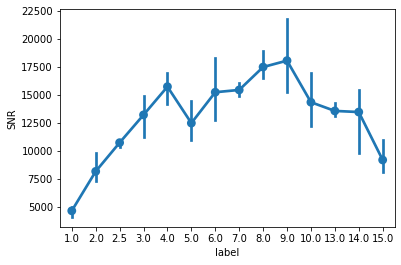

In [11]:
import seaborn as sns


In [7]:
# SAVINSKY GOLAY FILTER YOUR DATA
def get_label(name):
    if name.find('sfd')>=0:
        return 'SFD'
    else:
        return "Gravity"

    
def find_noise(Y, width=50, skip=5):
    noise = np.nan
    background = np.nan
    for i in range(skip,len(Y)-width-skip):
        new_noise = np.std(Y[i:i+width])
        
        if new_noise < noise or np.isnan(noise):
            noise = new_noise
            background = np.median(Y) 
    print(noise, background)
    return noise, background
    
rfuss = None
DATA_FOLDER = r"C:\Users\NikonTE300CE\Desktop\Matt A\11_14_20 CE Data"
data = {'label':[],'max':[], 'SNR':[], 'noise':[], "background":[], "location":[],'file':[],"CA":[]}
for file in glob.glob(DATA_FOLDER+"\*.csv"):
    print(file)
    df = pd.read_csv(file)
    df['rfu']=filter_butter(df, cutoff=2,order=2 )
    lbl = get_label(file)
    noise, background = find_noise(df['rfu'])
    if rfuss is None:
        rfuss= df['rfu'].values[0:380]
    else:
        rfuss =np.add(rfuss[0:380],df['rfu'].values[0:380])
    peaks, properties = find_peaks(df['rfu'], height=10*noise+background, threshold=0.00001, width=3, rel_height=0.98)
    for pk, start, stop in zip(peaks, properties['left_ips'], properties['right_ips']):
        area = np.trapz(df['rfu'].values[int(start):int(stop)]-background,df['time_data'].values[int(start):int(stop)])
        ca = area/df['time_data'].values[pk]
        data['label'].append(lbl)
        data['max'].append(df['rfu'].values[pk]-background)
        data['SNR'].append((df['rfu'].values[pk]-background)/noise)
        data['noise'].append(noise)
        data['background'].append(background)
        data['location'].append(pk)
        data['file'].append(file)
        data['CA'].append(ca)
    

C:\Users\NikonTE300CE\Desktop\Matt A\11_14_20 CE Data\50 nM C24C, 24C DiP 2 mW 10 mM T20 1% DMSO.csv
4.439376657869912e-06 0.0051759816302005025
C:\Users\NikonTE300CE\Desktop\Matt A\11_14_20 CE Data\50 nM C24C, 24C DiP 2 mW 10 mM T20 1% DMSO_00000.csv
7.856990927028411e-06 0.005235281277574636
C:\Users\NikonTE300CE\Desktop\Matt A\11_14_20 CE Data\50 nM C24C, 24C DiP 2 mW 10 mM T20 1% DMSO_00001.csv
5.612540945066414e-06 0.005183621010531164
C:\Users\NikonTE300CE\Desktop\Matt A\11_14_20 CE Data\50 nM C24C, 24C DiP 2 mW 10 mM T20 1% DMSO_00002.csv
8.28183694730405e-06 0.005193284496902435
C:\Users\NikonTE300CE\Desktop\Matt A\11_14_20 CE Data\50 nM C24C, 24C DiP 2 mW 10 mM T20 1% DMSO_00003.csv
5.4447925100023955e-06 0.00517061081972892
C:\Users\NikonTE300CE\Desktop\Matt A\11_14_20 CE Data\50 nM C24C, 24C DiP 2 mW 10 mM T20 1% DMSO_00004.csv
6.818122735382922e-06 0.005205168327019023
C:\Users\NikonTE300CE\Desktop\Matt A\11_14_20 CE Data\50 nM C24C, 24C DiP 2 mW 10 mM T20 1%DMSO.csv
6.2222

In [7]:
df2 = pd.DataFrame(data)
fluor_peak = df2[df2['location'].between(0, 400, inclusive=False)]
fluor_peak = fluor_peak[fluor_peak['SNR']>1000]
fluor_peak

,label,max,SNR,noise,background,location,file
13,Gravity,0.049141,6502.421542,0.000008,0.006363,246,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...
48,Gravity,0.055336,5842.354133,0.000009,0.006456,245,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...
80,Gravity,0.052902,6518.625266,0.000008,0.006524,247,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...
112,Gravity,0.052579,5083.847027,0.000010,0.006587,245,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...
150,Gravity,0.049656,4890.121962,0.000010,0.006529,246,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...
183,Gravity,0.055221,6509.888247,0.000008,0.006541,244,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...
213,Gravity,0.047580,5968.185603,0.000008,0.006479,244,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...
225,Gravity,0.053441,2809.193385,0.000019,0.007560,134,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...
233,Gravity,1.649920,86730.386435,0.000019,0.007560,197,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...
260,Gravity,0.054161,5648.817406,0.000010,0.007183,224,C:\Users\NikonTE300CE\Desktop\Brae\10-26-2020\...


In [8]:
grav = fluor_peak[fluor_peak['label']=='Gravity']
sfd = fluor_peak[fluor_peak['label']=='SFD']
g_u = grav['CA'].mean()
g_e = grav['CA'].std()
s_u = sfd['CA'].mean()
s_e = sfd['CA'].std()

g_v = 50e-12
s_v = g_v/((g_u-s_u)/s_u) 
print(f'Grav Mean: {g_u:.3e} +/- {g_e:.3e} \nSFD Mean: {s_u:.3e} +/- {s_e:.3e}')
print(f'spontaneous fluid dispacement volume: {s_v:.3e}')

s_snr = sfd['SNR'].mean()
s_noise = sfd['noise'].mean()
factor = s_snr/3
moles = s_v * 100e-9 
moles_lod = moles/factor

print(f'Mass LOD: {moles_lod:.3e}')

Grav Mean: 1.532e-03 +/- 6.087e-05 
SFD Mean: 1.256e-03 +/- 1.354e-05
spontaneous fluid dispacement volume: 2.279e-10
Mass LOD: 6.686e-21


In [49]:
s_snr/3

3407.856796071155

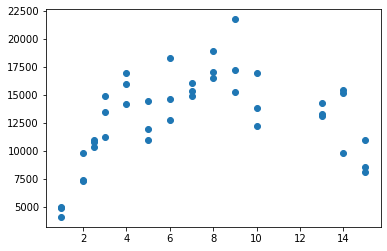

In [7]:
plt.scatter(fluor_peak['label'], fluor_peak['SNR'])

<AxesSubplot:xlabel='label', ylabel='SNR'>

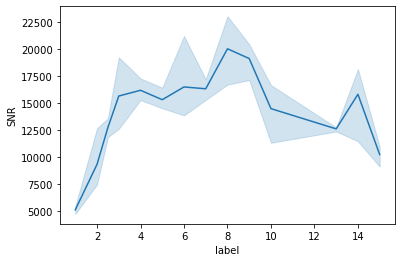

In [215]:
sns.lineplot(x='label', y='SNR', data = fluor_peak )

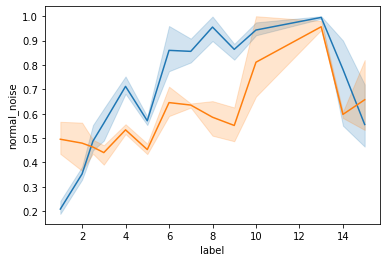

In [211]:
sns.lineplot(x='label', y='normal_max', data=fluor_peak )
sns.lineplot(x='label', y='normal_noise', data=fluor_peak)
pass

In [129]:
plt.plot(df['rfu'].values)

In [72]:
plt.figure()
plt.plot(rfuss)

In [114]:
df2 = pd.DataFrame(data)

In [81]:
df2.head()

,label,max,SNR,noise,background,location
0,Gravity,0.000155,26.896275,0.000006,0.000006,167
1,Gravity,0.000473,82.367854,0.000006,0.000006,187
2,Gravity,0.001886,328.210883,0.000006,0.000006,201
3,Gravity,0.005778,1005.377653,0.000006,0.000006,216
4,Gravity,0.000974,169.489183,0.000006,0.000006,283


In [68]:
plt.figure()
plt.hist(fluor_peak['location'], bins=100)
pass

In [107]:
800/8

100.0

(1) $ F = 2.3 \epsilon \phi C^{o} (\frac{d^{2}_{c}}{2r_{L}})\frac{\pi v_z r_L}{2k_D} (1-e^{-\sigma})$

(2) $ \sigma = \frac{2k_{d}P}{\pi v_z r_L}$


* $F$ = fluoresence intensity (photons/s)
* $\epsilon$ = coefficient of molar extinction for fluorophore
* $\phi$ = quantum yield of the fluorophore
* $C^o$ = concentration of fluorophore in a capillary 
* $d^{2}_{c}$ internal diameter of the capillary
* $r_L$ radius of laser beam width ($e^2$ irradiance)
* $v_z$ velocity of the analyte through the capillary
* $k_d$ photodegradation rate
* $\sigma$ is the reduced laser light power
* $P$ is the light power getting inside the capillary

(1) $V_c = \frac{\Delta P \pi d^4 t}{128 \eta L_t}$

for gravity: 

(2) $\Delta P = \rho g \Delta h$

In [88]:
pressures = [293, 3557]
volume = [2.91e-2 ,1.28]
label = ['Custom CE', 'MDQ+']
d = {'Pascal':pressures,'Typical Volume':volume,
    'Injection Type':label}
df_inj = pd.DataFrame(d)

In [89]:
sns.set_context('talk')
fig, ax = plt.subplots()
sns.barplot(x='Injection Type', y='Typical Volume', data = df_inj, ax = ax)
ax.set_ylabel('Volume (nL)')
ax.set_xlabel('Instrument')
plt.tight_layout()

In [130]:
np.exp(-100)

3.720075976020836e-44

In [131]:
np.exp(-10)

4.5399929762484854e-05